In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Goal: Model a system of a triprotic acid evolving in time.

From basic chemical intuition, we can write the following three reaction equations for a triprotic acid.

$$H_3A \Longleftrightarrow H_2A^- + H^+$$

$$H_2A^- \Longleftrightarrow HA^{2-} + H^+$$

$$HA^{2-} \Longleftrightarrow A^{3-} + H^+$$

From these chemical equations, we can come up with a system of 5 coupled first-order differential equations to model how the concentration of each reagent changes with time.

$$\frac{d[H_3A]}{dt} = -k_{1f}[H_3A] + k_{1r}[H_2A^-][H^+]$$

$$\frac{d[H_2A^-]}{dt} = k_{1f}[H_3A] - k_{1r}[H_2A^-][H^+] - k_{2f}[H_2A^-] + k_{2r}[HA^{2-}][H^+]$$

$$\frac{d[HA^{2-}]}{dt} = k_{2f}[H_2A^-] - k_{2r}[HA^{2-}][H^+] - k_{3f}[HA^{2-}] + k_{3r}[A^{3-}][H^+]$$

$$\frac{d[A^{3-}]}{dt} = k_{3f}[HA^{2-}] - k_{3r}[A^{3-}][H^+]$$

$$\frac{d[H^+]}{dt} = k_{1f}[H_3A] - k_{1r}[H_2A^-][H^+] + k_{2f}[H_2A^-] - k_{2r}[HA^{2-}][H^+] + k_{3f}[HA^{2-}] - k_{3r}[A^{3-}][H^+]$$

There are many numerical integration methods one can use to solve such a system of equations. We will explore them here.

In [12]:
# We first define a single function that takes in a list of all the starting concentrations, along with the rate constants.

def dCdt(C,k1f=1,k1r=1,k2f=1,k2r=1,k3f=1,k3r=1):
    H3A, H2A, HA, A, H = C

    dH3A_dt = -k1f*H3A + k1r*H2A*H
    dH2A_dt = k1f*H3A - k1r*H2A*H - k2f*H2A + k2r*HA*H
    dHA_dt = k2f*H2A - k2r*HA*H - k3f*HA + k3r*A*H
    dA_dt = k3f*HA - k3r*A*H
    dH_dt = k1f*H3A - k1r*H2A*H + k2f*H2A - k2r*HA*H + k3f*HA - k3r*A*H

    return [dH3A_dt,dH2A_dt,dHA_dt,dA_dt,dH_dt]

### Euler's Method

Euler's method is perhaps the most obvious way that one would evolve a differential equation in time. Given some time step, the value of your independent variable at the next time step is simply the value at the current time step plus the change calculated from our differential equation.



In [20]:
def euler(f, y0, nsteps, dt, *args):
    y = np.zeros((nsteps,len(y0)))
    y[0] = y0

    for i in range(1, nsteps):
        y[i] = y[i-1] + np.array(f(y[i-1],*args)) * dt
    
    t = np.arange(0,nsteps*dt,dt)
    
    return t,y

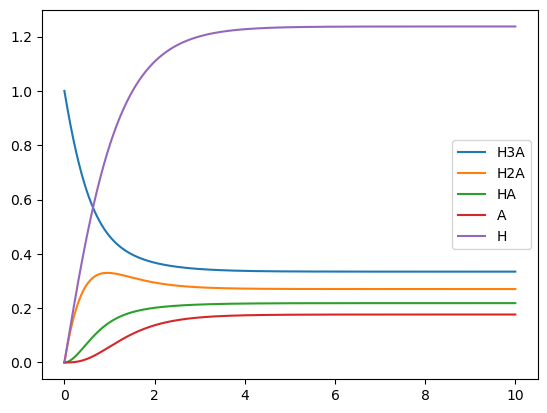

In [26]:
C0 = [1.0, 0.0, 0.0, 0.0, 1e-7]
nsteps = 10000
dt = 0.001

t,C_of_t = euler(dCdt, C0, nsteps, dt)

labels = ['H3A','H2A','HA','A','H']
for i in range(5):
    plt.plot(t,C_of_t[:,i],label=labels[i])
plt.legend()